In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu # teste de Mannwhitney U
import seaborn as sns

from src.config import DADOS_ORIGINAIS, DADOS_TRATADOS
from src.models import RANDOM_STATE

sns.set_theme()

In [2]:
# carregando a base de dados
df = pd.read_csv(DADOS_ORIGINAIS, compression="zip")

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# verificando a descrição de todas as 31 colunas, formatadas para duas casas decimais
with pd.option_context("display.max_columns", None):
    display(df.describe().round(2))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,1.02,1.00,1.00,0.96,0.92,0.88,0.85,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-14.13,-25.16,-9.50,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


- Algum procedimento foi realizado para ajustar os valores das features baseadas nos componentes principais (PCA), as colunas $V_i$ estão com média igual a zero. Devido ao PCA, essas variáveis passaram por um procedimento que centralizou a média em zero, mas deixou os valores mínimos e máximos muito distantes e variando muito entre cada feature, sem ajustar os limites, que é algo que pode se tornar um problema.
  
- Na feature Amount, é normal que as variáveis contendo valores de transações financeiras tenham discrepâncias, com muitos valores altos assim como na vida acontece, as pessoas têm condição financeira diferente e como consequência realizarão transações de acordo. Devemos ter cuidado na remoção de outliers, os quartis estão bem próximos, mas o valor máximo está muito distante, isso pode gerar um pouco de conflito na predição já que a remoção desses valores pode impactar no desempenho do modelo. O valor mínimo é zero, podemos verificar quantos valores zeros têm na base.

In [6]:
# verificando quantos valores zeros têm em cada feature
df[df == 0].count()

Time           2
V1             0
V2             0
V3             0
V4             0
V5             0
V6             0
V7             0
V8             0
V9             0
V10            0
V11            0
V12            0
V13            0
V14            0
V15            0
V16            0
V17            0
V18            0
V19            0
V20            0
V21            0
V22            0
V23            0
V24            0
V25            0
V26            0
V27            0
V28            0
Amount      1825
Class     284315
dtype: int64

- `time` - dois valores zeros que são dos primeiros registros, que não teve uma diferença de tempo entre as transações. Os dados do conjunto foram coletados em um período de 2 dias, mas não é especificado quando isso foi coletado.
- `Amout` - Não temos informações claras do porquê de tantos valores zeros, mas fica o questionamento. Algumas possibilidades dentro do contexto dessa base são:
    -  Quando um cartão é cadastrado em alguma plataforma de pagamento, algumas vezes é realizada uma transação teste, que verifica se o cartão do cliente está ativo, para evitar o cadastro de cartões inativos.


In [7]:
# verificando a quantidade de valores da classes target
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
# proporção de valores em relação ao todo da base, multiplicando por 100 para trazer a porcentagem
df["Class"].value_counts(normalize=True) * 100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

- 99,83% da base de dados tem registros legítimos, não fraudulentos, e apenas 0,17% de registros fraudulentos, isso indica um desbalanceamento severo.

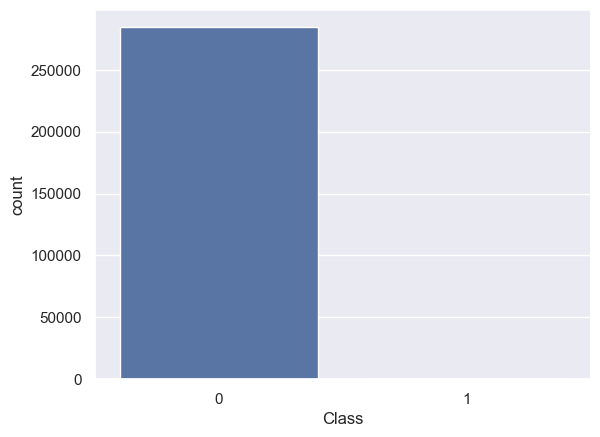

In [9]:
fig, ax = plt.subplots()

# criando um gráfico de contagem das classes
sns.countplot(data=df, x="Class", ax=ax);

- O problema dessa contagem é que existem tantos registros da classa majoritária (0), que a classe minoritária não está sendo notada. Por padrão, o matplotlib usa uma escala crescente e linear de valores no eixo y, vamos ajustar a escala para que a classe minoritária seja notada visualmente.

C:\Users\barbo\AppData\Local\Temp\ipykernel_18716\2695449730.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=["legitima", "fraudulenta"]) # alterando o nome das classes no eixo x


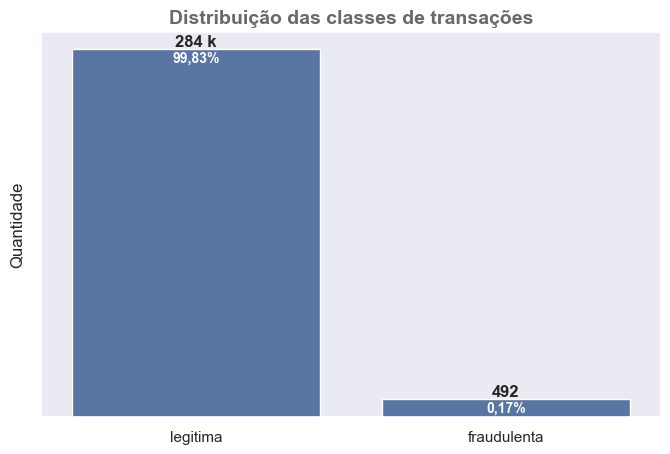

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))

# criando um gráfico de contagem das classes
sns.countplot(data=df, x="Class", ax=ax)

eng_fmt = EngFormatter(places=0) # cria um ajuste de casas decimais para os tickers
ax.yaxis.set_major_formatter(eng_fmt) # aplica o ajuste de casas decimais

ax.set_yscale("log") # ajustando a escala do eixo y para logarítmica ("linear", "log", "função",...)

# incluindo os rótulos referente a contagem de cada classe em uma barra
ax.bar_label(
    ax.containers[0], # incluindo a contagem de cada classe nas barras
    label_type="edge", 
    weight="bold", # rótulo em negrito
    labels= map(eng_fmt.format_eng, df["Class"].value_counts()) # aplicando um mapeamento [map(função, iteração)] do formato de engenheiro (200 k - 200 mil) para cada contagem de classe
)

# incluindo os rótulos referente ao percentual de cada classe em uma barra
ax.bar_label(
    ax.containers[0], # incluindo a contagem de cada classe nas barras
    label_type="edge", 
    weight="bold", # rótulo em negrito
    labels= map(lambda num: f"{num:.2%}".replace(".", ","), df["Class"].value_counts(normalize=True)), # aplicando um mapeamento com lambda function para exibir a proporção de cada classe
    padding=-11, # ajustando o rótulo para dentro da barra
    color="white", # cor do percentual
    fontsize=10, # tamanho da fonte
)

ax.set_xticklabels(labels=["legitima", "fraudulenta"]) # alterando o nome das classes no eixo x

ax.set_yticks([]) # removendo os valores da escala do eixo y
ax.set_title(
    "Distribuição das classes de transações", 
    weight="bold",
    color="dimgrey",
    fontsize=14
) # título
ax.set_xlabel("") # rótulo do eixo x
ax.set_ylabel("Quantidade") # rótulo do eixo y

plt.show()

In [11]:
# a base de dados foi coletada em um período de 2 dias
df["Time"].max() / 60 / 60

np.float64(47.99777777777778)

- Foi usado o valor máximo dos segundos da coluna `Time`, os segundos foi divididos por 60 para encontrar os minutos, os minutos por 60 e teremos aproximadamente 48 horas, que é o tempo estimado da coleta de transações.

C:\Users\barbo\anaconda3\envs\identificacao_fraudes\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


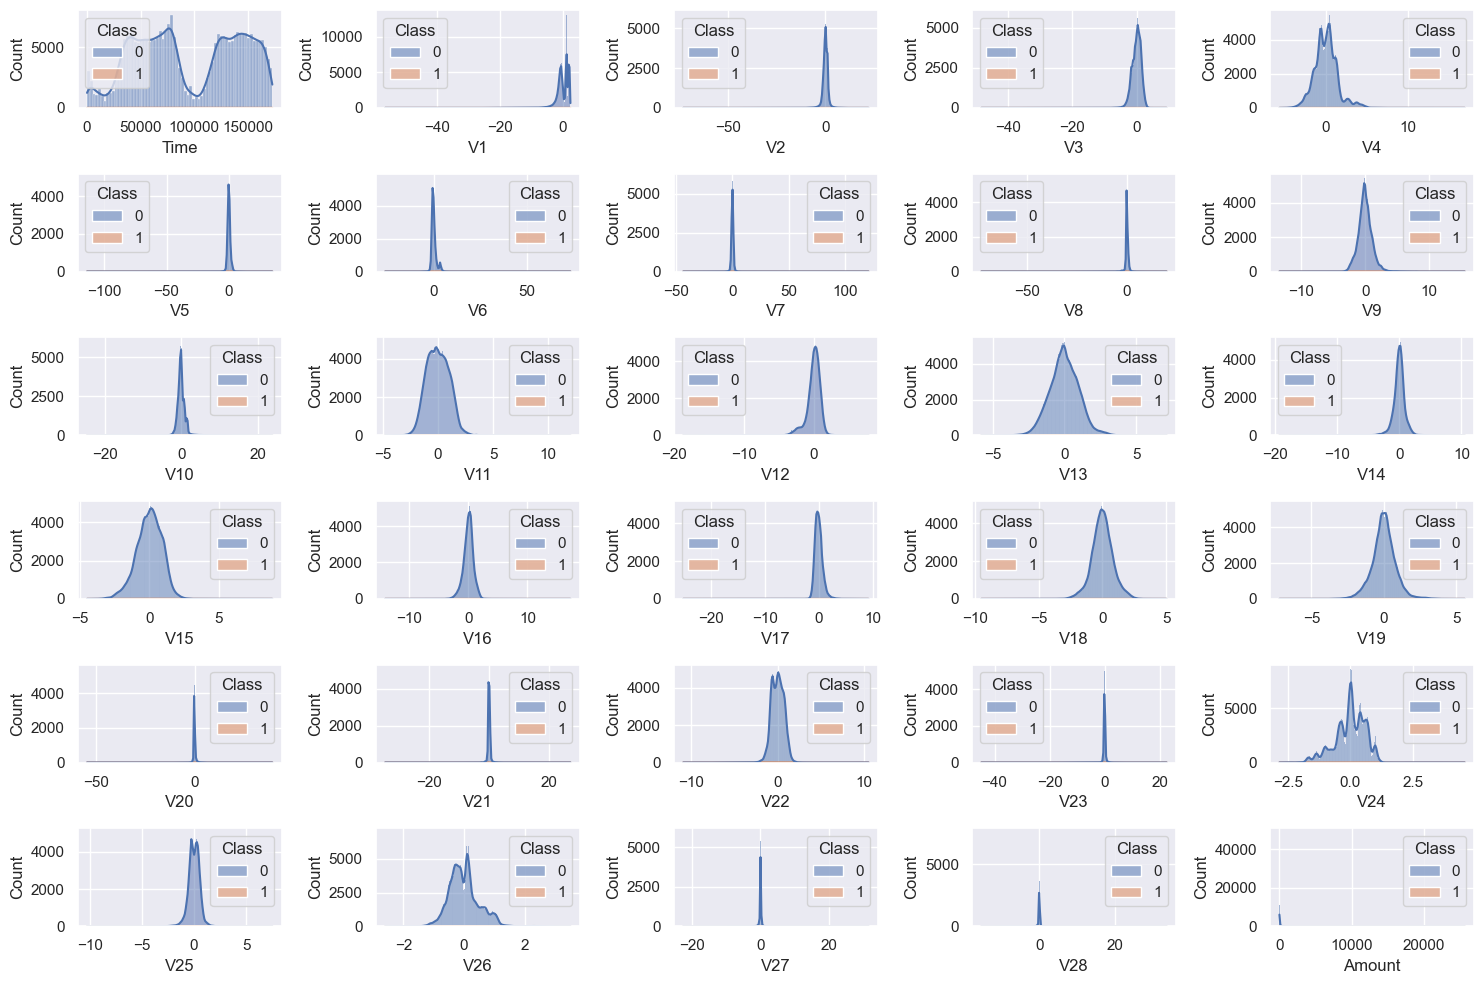

In [12]:
# criando histogramas com todos os dados das colunas numéricas, apenas com a área sob a curva usando a mesma proporção
fig, ax = plt.subplots(nrows=6, ncols=5, figsize=(15, 10), tight_layout=True)

for ax, coluna in zip(ax.flatten(), df.columns):
    sns.histplot(
        data=df, # base de dados
        x=coluna, # distribuição univariada
        ax=ax, # sistema de eixo
        kde=True, # linha de área sob a curva
        hue="Class", # classe separada
    );

- Como por padrão o histograma é uma contagem, fica impossível identificar a classe minoritária devido a diferença na quantidade de registros, a classe majoritária tem mais de 280.000 registros enquanto a classe minoritária tem pouco mais de 490 registros. Se ambas as classes forem usadas em uma proporção conjunta, é impossível notar uma das classes, por isso que seria interessante separar a proporção de cada uma, para que a área sob a curva de cada classe seja independente graficamente.

C:\Users\barbo\anaconda3\envs\identificacao_fraudes\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


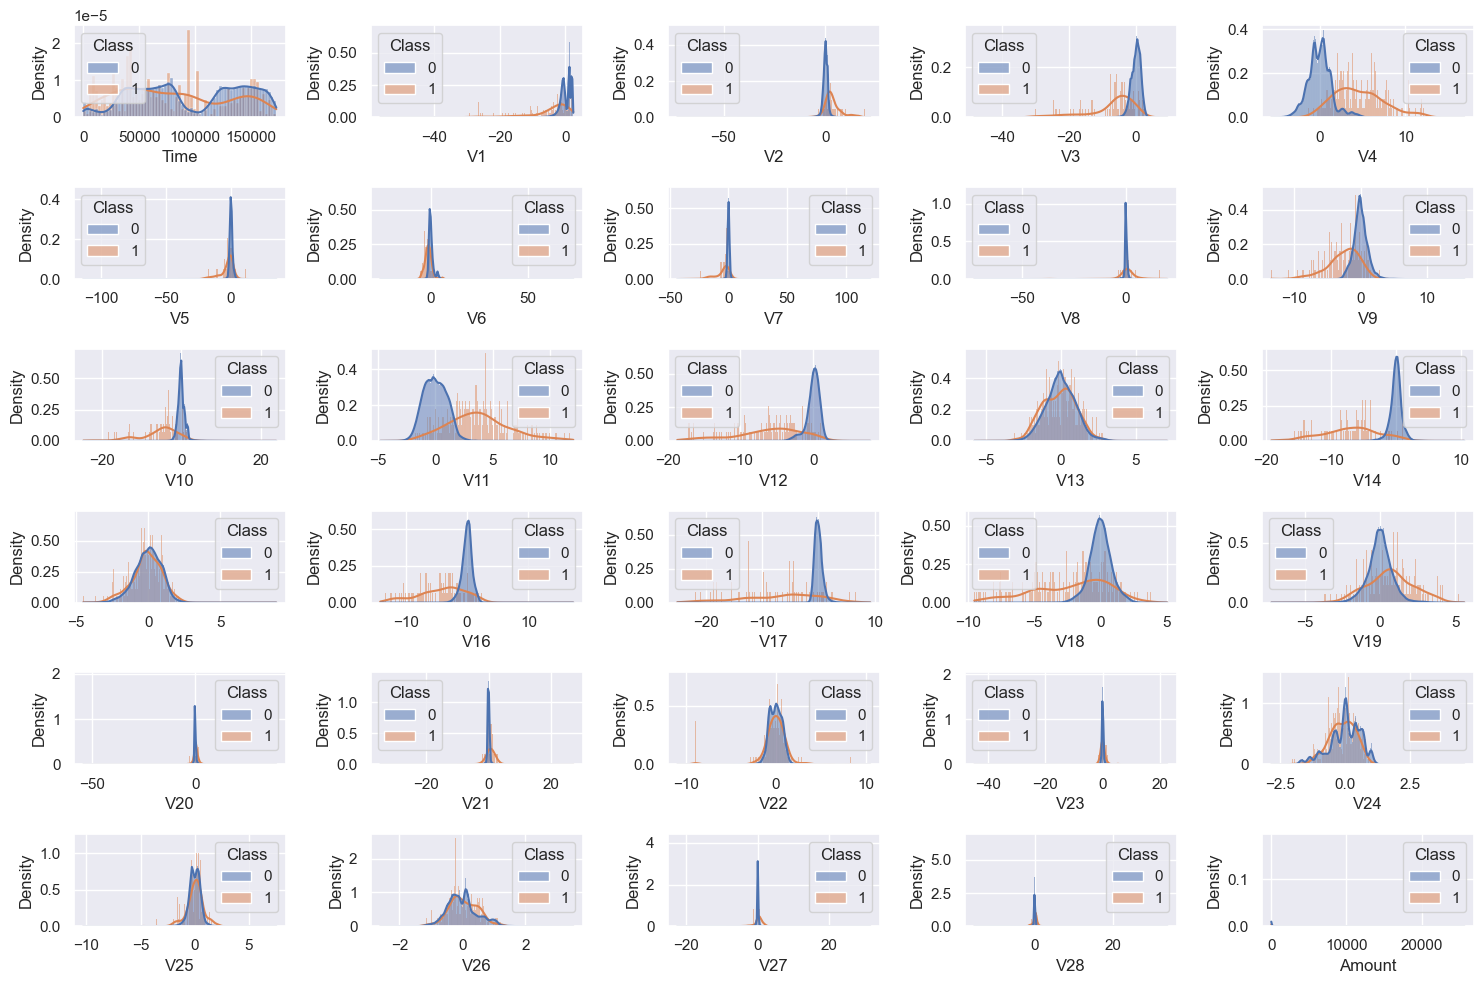

In [13]:
# criando histogramas com todos os dados das colunas numéricas, com as áreas sob as curvas usando proporções independentes
fig, ax = plt.subplots(nrows=6, ncols=5, figsize=(15, 10), tight_layout=True)

for ax, coluna in zip(ax.flatten(), df.columns):
    sns.histplot(
        data=df, # base de dados
        x=coluna, # distribuição univariada
        ax=ax, # sistema de eixo
        kde=True, # linha de área sob a curva
        hue="Class", # classe separada
        stat="density", # densidade da área sob a curva kde
        common_norm=False, # proporção independente entre as áreas sob as curvas de cada classe
    );

Assim que foi incluída a densidade da área sob a curva e a independência da proporção dos dados de cada classe, que deixa de ter duas classes com o eixo em comum, para que os eixos sejam separados, e seja possível identificar a área ocupada pelos dados de cada classe.

Na coluna `Time`, como a base de dados foi gerada em um período de 2 dias
- Uma possível explicação para as ondulações na classe 0, classe azul majoritária, é que:
    - A coleta dos dados foi iniciada às 00h, com um número menor de transações no período da madrugada, há um aclive e constância durante os horários comerciais no dia, as transações tiveram um declive entre o fim da noite e madrugada, assim o ciclo se repete no próximo dia.
    - Na classe 1 não há as mesmas ondulações, além de uma leve queda fora do possível horário comercial, caso a explicação do horário comercial esteja correta.

Em algumas colunas é possível identificar a separação das classe, como:
- `V3`, `V4`, `V9`, `V10`, `V11`, `V12`, `V14`, `V16`, `V17` e `V18`.
      
Nas demais colunas $V_i$ a separação não é tão clara, com os gráficos em sobreposição, indicando uma dificuldade para separar os valores das duas classes.

Na coluna `Amount`, não é possível visualizar muito bem a distribuição dos dados, porque existem outliers que deixaram a escala bem distante dos quartis da coluna. Nela, será necessário realizar algum ajuste ou outro tipo de visualização para entendê-la melhor.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html

In [14]:
# realizando uma amostragem dos dados de cada classe, que primeiro passará por um agrupamento
df_sample = df.groupby("Class").sample(n=400, random_state=RANDOM_STATE)

df_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
138028,82450.0,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,...,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.76,0
63099,50554.0,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,...,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,4.18,0
73411,55125.0,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,...,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,15.00,0
164247,116572.0,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,...,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,57.00,0
148999,90434.0,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,...,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.00,0


- Como os gráficos do matplotlib têm uma certa lentidão na reprodução de gráficos de bases de dados muito grandes, neste caso são mais de 280.000 registros, seria interessante trabalhar com amostragem. A amostragem vai pegar uma quantidade de registros aleatórios da base de dados, ao invés de todos os registros, isso possibilitará a reprodução de gráficos mais rápidos, mas pode causar uma certa perda na distribuição dos dados, mesmo assim é útil porque funciona bem. Esse método serve quando existe um desbalanceamento severo entre as classes, usando o agrupamento e amostragem podemos ter amostras com contagem equivalente, ajustando as proporções para equilibrá-las.

    - Primeiro será realizado o agrupamento das classes para que a amostragem retorne a quantidade de registros equivalentes para cada classem, neste caso serão 400 amostras para cada classe, com uma pseudoaleatoriedade fixada.

In [15]:
# fazendo a contagem dos valores de cada classe amostradas
df_sample["Class"].value_counts()

Class
0    400
1    400
Name: count, dtype: int64

- Como os dados estão agrupados, a contagem de valores retornou a quantidade exata para cada classe

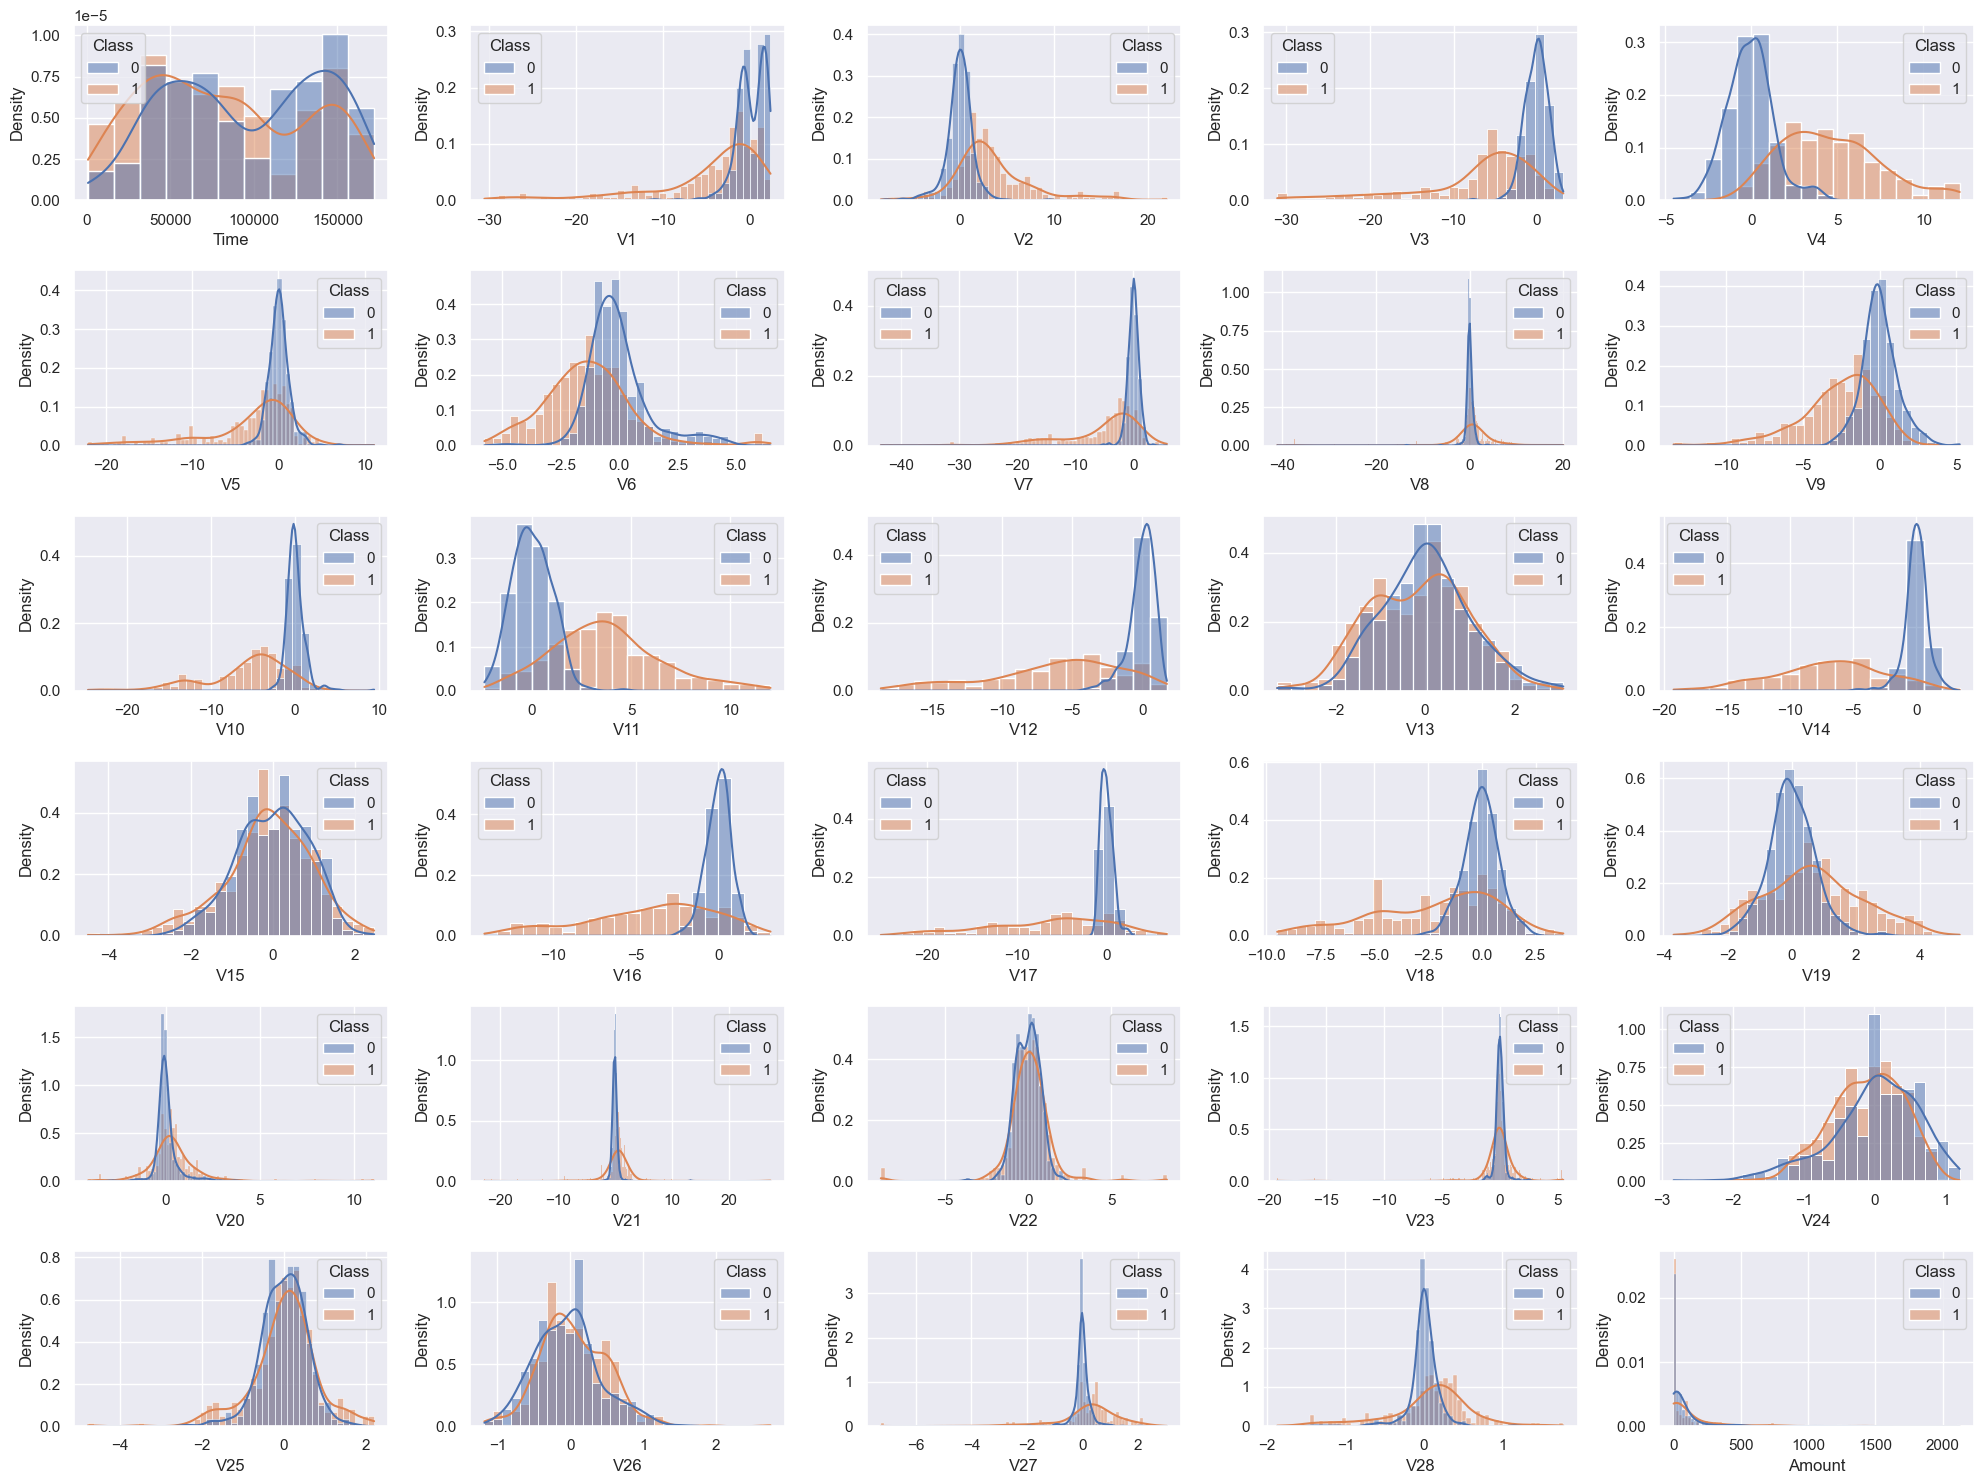

In [16]:
# criando os histogramas com o df de amostras
fig, ax = plt.subplots(nrows=6, ncols=5, figsize=(20, 15), tight_layout=True)

for ax, coluna in zip(ax.flatten(), df_sample.columns):
    sns.histplot(data=df_sample, x=coluna, hue="Class", ax=ax, kde=True, stat="density", common_norm=False)

plt.show()

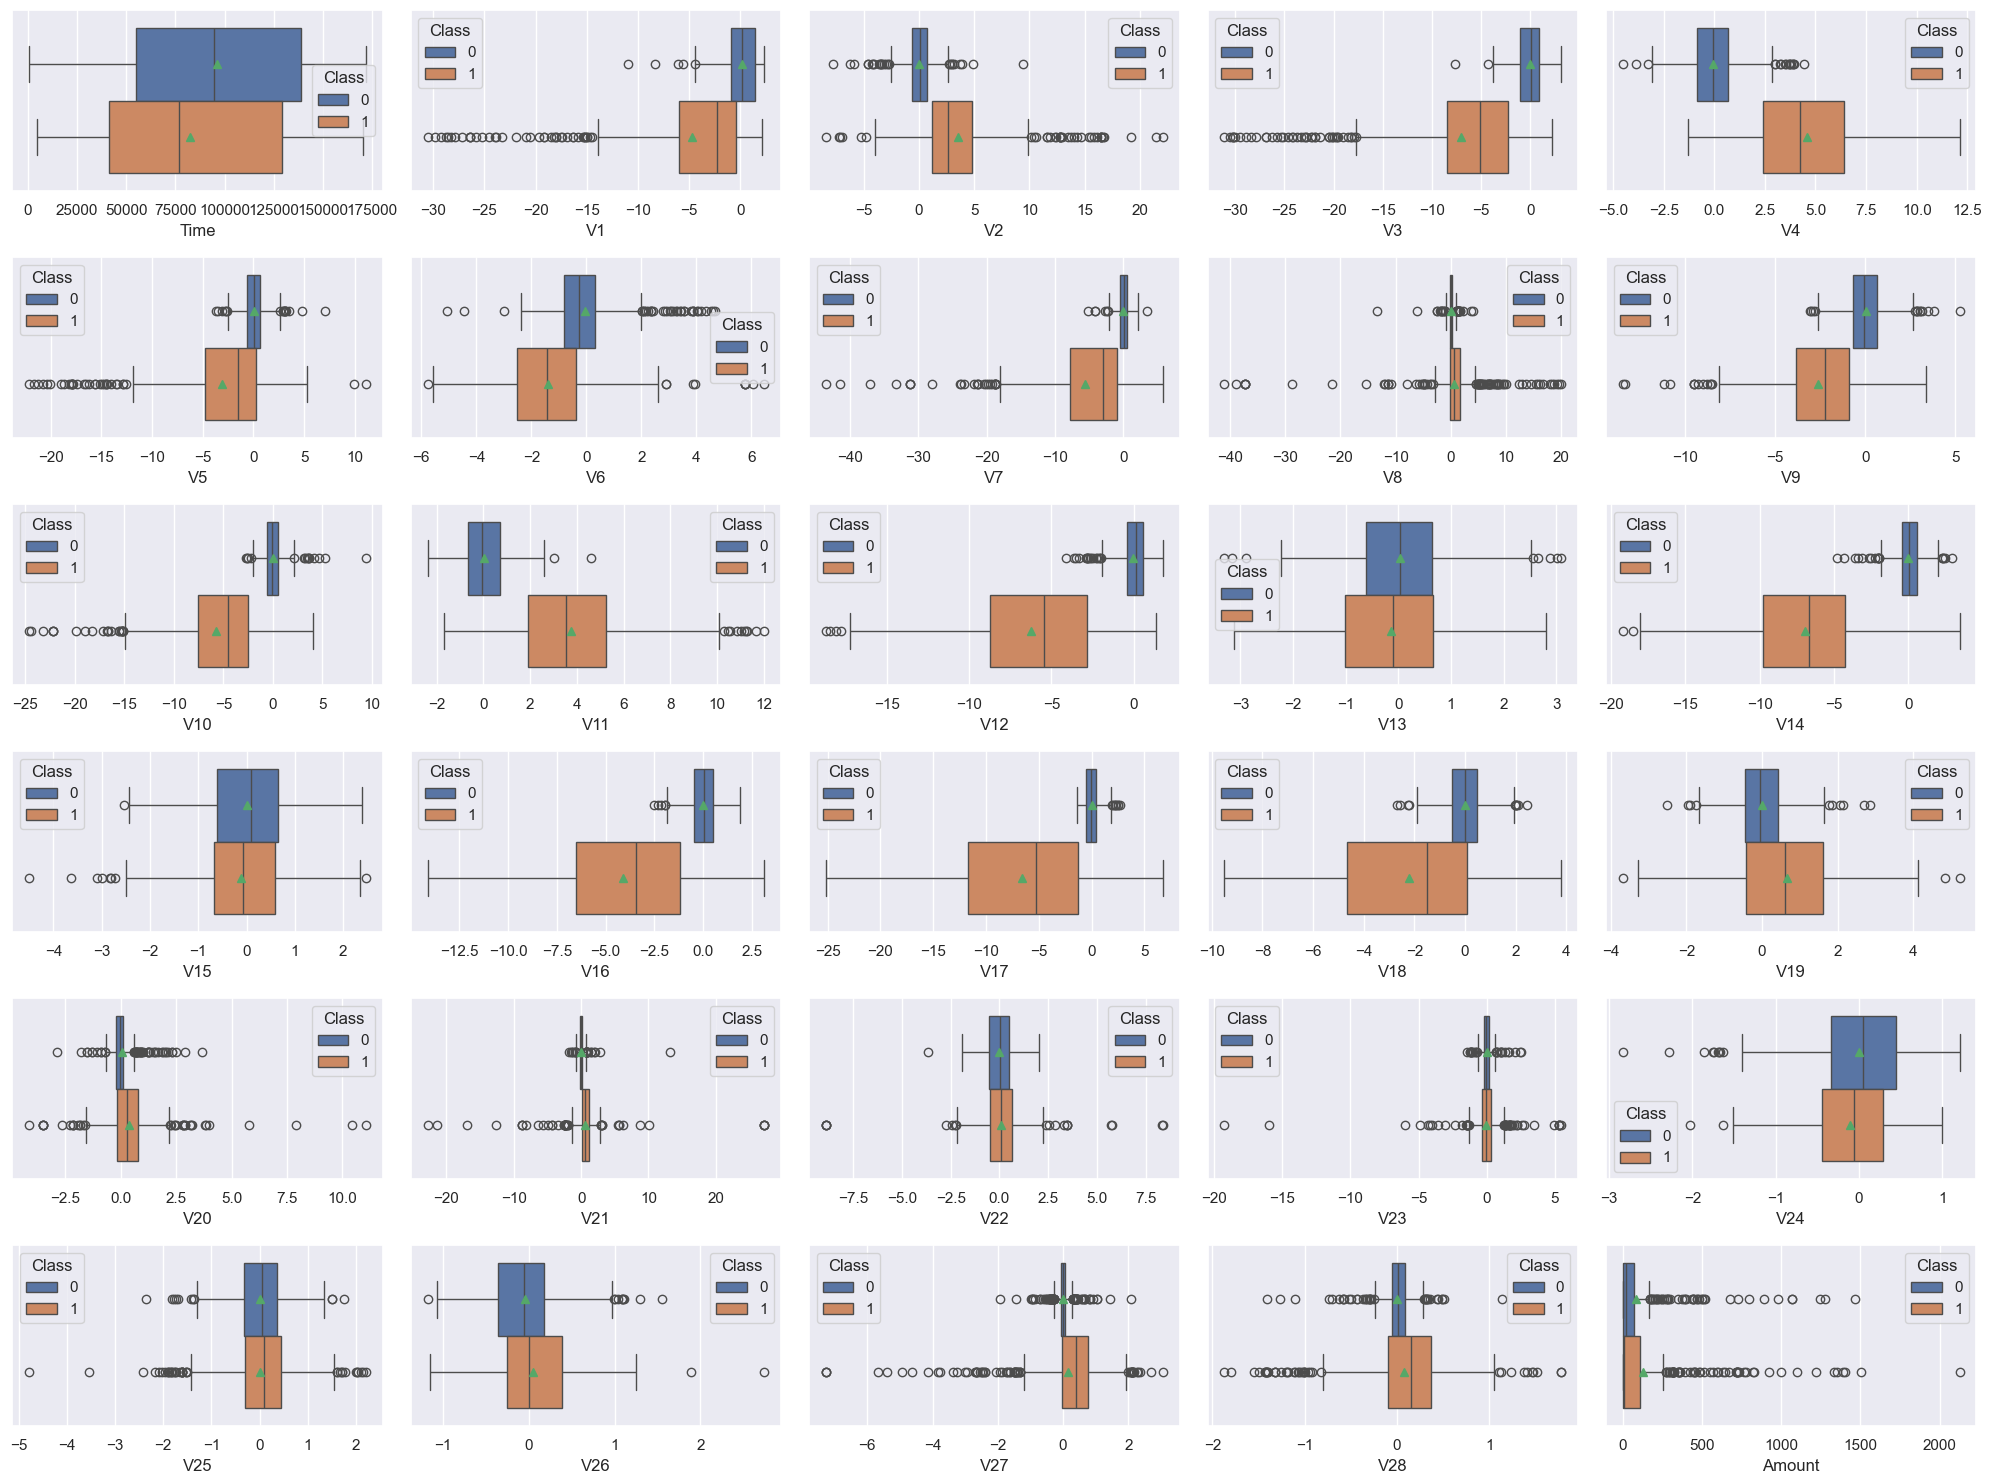

In [17]:
# criando boxplots com as amostras
fig, ax = plt.subplots(nrows=6, ncols=5, figsize=(20, 15), tight_layout=True)

for ax, coluna in zip(ax.flatten(), df_sample.columns):
    sns.boxplot(data=df_sample, x=coluna, hue="Class", ax=ax, showmeans=True)

plt.show()

- Os boxplots são gerados mais rápidos que os histogramas porque são usados apenas 5 valores para a identificação dos intervalos interquartis, são eles:
    - Mínimo, primeiro quartil (Q1), mediana (Q2), terceiro quartil (Q3) e máximo.
- Os histogramas são demorados porque são realizados alguns cálculos internos de intervalos (bins) e contagem dos valores dentro de cada um desses intervalos. Isso, deixa o processamento lento em bases de dados com muitos registros, como o usado atualmente.

Algumas features apresentam valores fora do padrão, os famosos outliers, mesmo que a maioria dessas features sejam resultado de uma análise de componentes principais (PCA), algumas delas apresentam boa separação entre os corpos dos boxplots das classes, identificando que algumas features terão uma maior importância para o algoritmo de machine learning posteriormente. Para isso, adotaremos algum teste estatístico para identificar se a feature tem relação com o target ou não, são elas:
- uma análise de correlação entre as features, que pode ser via mapa de calor
- testes estatísticos

Podemos fazer a eliminação de algumas features que não tenham tanta importância para a separação das classes, principalmente, porque a base de dados tem 30 colunas independentes e uma redução baseada no impacto de cada uma delas pode trazer um ganho maior ao remover a complexidade, que mantida pode não trazer bons resultados.

Na remoção de outliers precisaremos ter cuidado, já que temos classes com desbalanceamento severo e podemos acabar removendo dados na classe minoritária, que são pouquíssimos comparado com a classe majoritária.

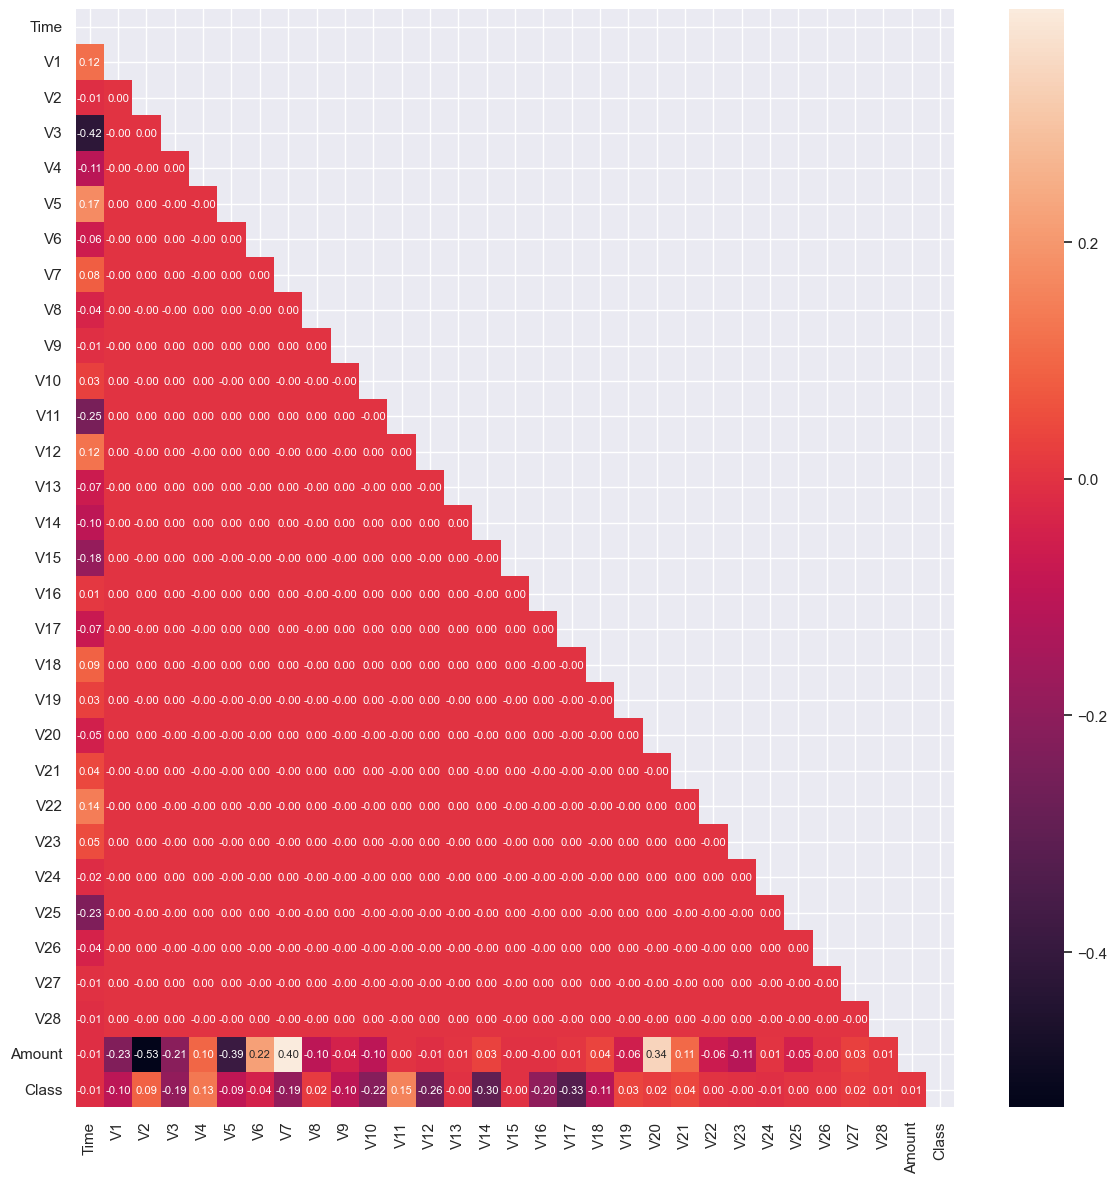

In [18]:
# criando um mapa de calor com todos os registros
corr = df.select_dtypes("number").corr() # pegando a correlação entre as variáveis numéricas

matriz = np.triu(corr) # criando um filtro para pegar apenas a diagonal abaixo da metade do mapa de calor

fig, ax = plt.subplots(figsize=(12, 12), tight_layout=True)

sns.heatmap(
    corr, # correlação das variáveis
    mask=matriz, # implementando a separação do gráfico
    annot=True, # anotando o valor da correlação
    fmt=".2f", # filtrando apenas duas casas decimais
    ax=ax, # sistema de eixo
    annot_kws={"fontsize": 8} # diminuindo a fonte da anotação
)

plt.show()

- Observando as correlações entre as features $V_i$ podemos notar que todas possuem correlações zeradas entre si, porque na análise de componentes principais é realizada uma redução de dimensionalidade e composição das features, cada uma das features pode ter uma participação em cada componente, que pode ser uma participação grande ou pequena, com maior importância ou com menor importância, sem gerar eliminações. A redução de dimensionalidade e composição das features em componentes, devido a participação das features em cada componente, cria componentes sem correlação entre si.
  
- As correlações zeradas podem ser fruto de um PCA ou uma feature com a distribuição tão cheia de outliers, que não é possível identificar a correlação entre as features.
- Nas features originais, provavelmente, tinham features relacionadas com o tempo ou quantia da transação, já que alguns componentes apresentam correlação com essas features. Algumas features apresentam correlação com a coluna `Class` (target), como algumas variáveis apresentam correlação próximas de zero, talvez essas features não sejam úteis para a diferenciação entre as classes.
    - Podemos analisar se as distribuições de cada feature em relação a cada classe independente no target são parecidas ou não. Como temos a presença de muitos outliers podemos usar um teste não paramétrico, como o teste U de Mannwhitney, para dados não paramétricos, ele vai indicar se há uma relação significativa entre a feature e a classe.

In [19]:
features = df.columns.drop("Class").to_list() # separando uma lista das variáveis exluindo o target

coluna_target = "Class" # variável target

analise_mw = {} # vamos armazenar os valores do teste mannwhitney U em forma de dicionário

classes = df[coluna_target].unique() # separando as classes

# alfa - valor de significância, o costume é usar 5%, mas devido a grande quantidade de registros, vamos adotar um alfa mais restrito
alfa = 0.01

agrupamento = df.groupby(coluna_target) # agrupamento pela coluna target

In [20]:
# iterando em cima de cada coluna
for coluna in features:
    grupo1 =  agrupamento.get_group(classes[0])[coluna] # agrupando os dados da classe 0 em cada coluna
    grupo2 =  agrupamento.get_group(classes[1])[coluna] # agrupando os dados da classe 1 em cada coluna

    # separando o valor da estatística e o p-valor
    estatistica_mw, pvalue_mw = mannwhitneyu(grupo1, grupo2) # comparando se as distribuições dos dois grupos vêm da mesma mediana

    # guardando os valores de cada coluna no dicionário
    analise_mw[coluna] = {
        "pvalue": pvalue_mw, # p valor 
        "estatistica": estatistica_mw, # valor da estatistica 
        "relacao_significativa": pvalue_mw < alfa, # booleano se o p valor for menor que o alfa 
    }

# criando um dataframe a partir do dicionário dos valores do teste U de Mann-Whitney
df_mw = pd.DataFrame(analise_mw).T

df_mw

,pvalue,estatistica,relacao_significativa
Time,0.0,81310602.0,True
V1,0.0,111193870.0,True
V2,0.0,20289296.0,True
V3,0.0,127583455.0,True
V4,0.0,8636598.0,True
V5,0.0,99256726.0,True
V6,0.0,107291012.0,True
V7,0.0,116915822.0,True
V8,0.0,47862020.0,True
V9,0.0,118073844.0,True


- Na coluna relação significativa podemos notar que algumas features possuem valores False, vamos filtrá-las

In [21]:
# criando uma condição para filtrar os valores falsos de uma coluna
df_mw.query("relacao_significativa == False")

,pvalue,estatistica,relacao_significativa
V13,0.051215,73493959.0,False
V15,0.129508,72703847.0,False
V22,0.266395,67916421.0,False
V25,0.012463,65388547.0,False


- Podemos comparar o resultado dessas 4 variáveis que não apresentam relação significativa com a separação das classes nos boxplots acima, para ajudar na visualização pode ser interessante duplicar a visualização desse notebook. O corpo dos boxplots das duas classes são bem próximos na classe V13, mas os corpos dos boxplots são iguais nas classes V15, V22 e V25, exceto pelos outliers.
- Com isso, podemos reduzir a base de dados com a remoção das features que não darão informação significativa para o algoritmo de machine learning posteriormente.

Se voltarmos nos boxplots, podemos notar que a maioria das features apresentam outliers, mas não podemos fazer remoção de dados, por exemplo, com o critério de quantil porque poderia eliminar registros da classe 1, a minoritária, e não seria interessante diminuir ainda mais a quantidade desses registros. Podemos tratar os outliers apenas na classe majoritária, já que a classe majoritária possui 99% dos dados presentes na base, ocasionando em um desbalanceamento severo. Outro ponto, na classe majoritária é possível identificar alguns pontos isolados dentre os outliers, que são ainda mais extremos, vamos removê-los com cautela.

In [22]:
# criando dataframes separados para cada classe, para que possamos tratá-las individualmente
df_majoritaria = df[df["Class"] == 0] # df com os registros da classe 0
df_minoritaria = df[df["Class"] == 1] # df com os registros da classe 1

# verificando o shape de cada dataframe separadamente
df_majoritaria.shape, df_minoritaria.shape

((284315, 31), (492, 31))

- Podemos notar a separação de registros por classe em cada dataframe

In [23]:
# criando uma função para remover os outliers baseado nos quantis
def remover_outliers_quantil(df, variaveis, quantil_inferior=0.05, quantil_superior=0.95):
    df_filtrado = df.copy() # criando uma cópia do dataframe
    for variavel in variaveis: # iterando sobre as variáveis
        limite_inferior = df[variavel].quantile(quantil_inferior) # separando um limite inferior dos quantis
        limite_superior = df[variavel].quantile(quantil_superior) # separando um limite superior dos quantis
        df_filtrado = df[(df[variavel] >= limite_inferior) & (df[variavel] <= limite_superior)] # selecionando os dados entre os limites inferior e superior do dataframe para remover outliers
    return df_filtrado # retorna um dataframe sem os outliers extremos

In [24]:
variaveis = df.columns.drop("Class") # separando todas as colunas exceto o target

# filtrando o dataframe da classe majoritária com a função de remoção de outiliers pelos quantis
df_majoritaria_filtrado = remover_outliers_quantil(df_majoritaria, variaveis)

df_majoritaria_filtrado.shape # verificando o shape da variável

(256088, 31)

- podemos notar que aproximadamente 28.000 registros da classe majoritária foram removidos.

In [25]:
# concatenando os dois dataframes, o majoritário sem outliers e o minoritário sem alterações
df_sem_outliers = pd.concat([df_majoritaria_filtrado, df_minoritaria])

df_sem_outliers.shape

(256580, 31)

- Agora temos 492 registros a mais, os dois dataframes foram unidos em um só

In [26]:
# verificando os índices dos registros
df_sem_outliers.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


- Como alguns valores foram removidos pela função de remoção de outliers pelos quantis, os índices acabaram não seguindo a ordem original, para isso precisamos resetar os índices.

In [27]:
# resetando os índices
df_sem_outliers = df_sem_outliers.reset_index(drop=True)

df_sem_outliers.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
3,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
4,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [28]:
# verificando a proporção de dados para cada classe multiplicada por 100
df_sem_outliers["Class"].value_counts(normalize=True) * 100

Class
0    99.808247
1     0.191753
Name: proportion, dtype: float64

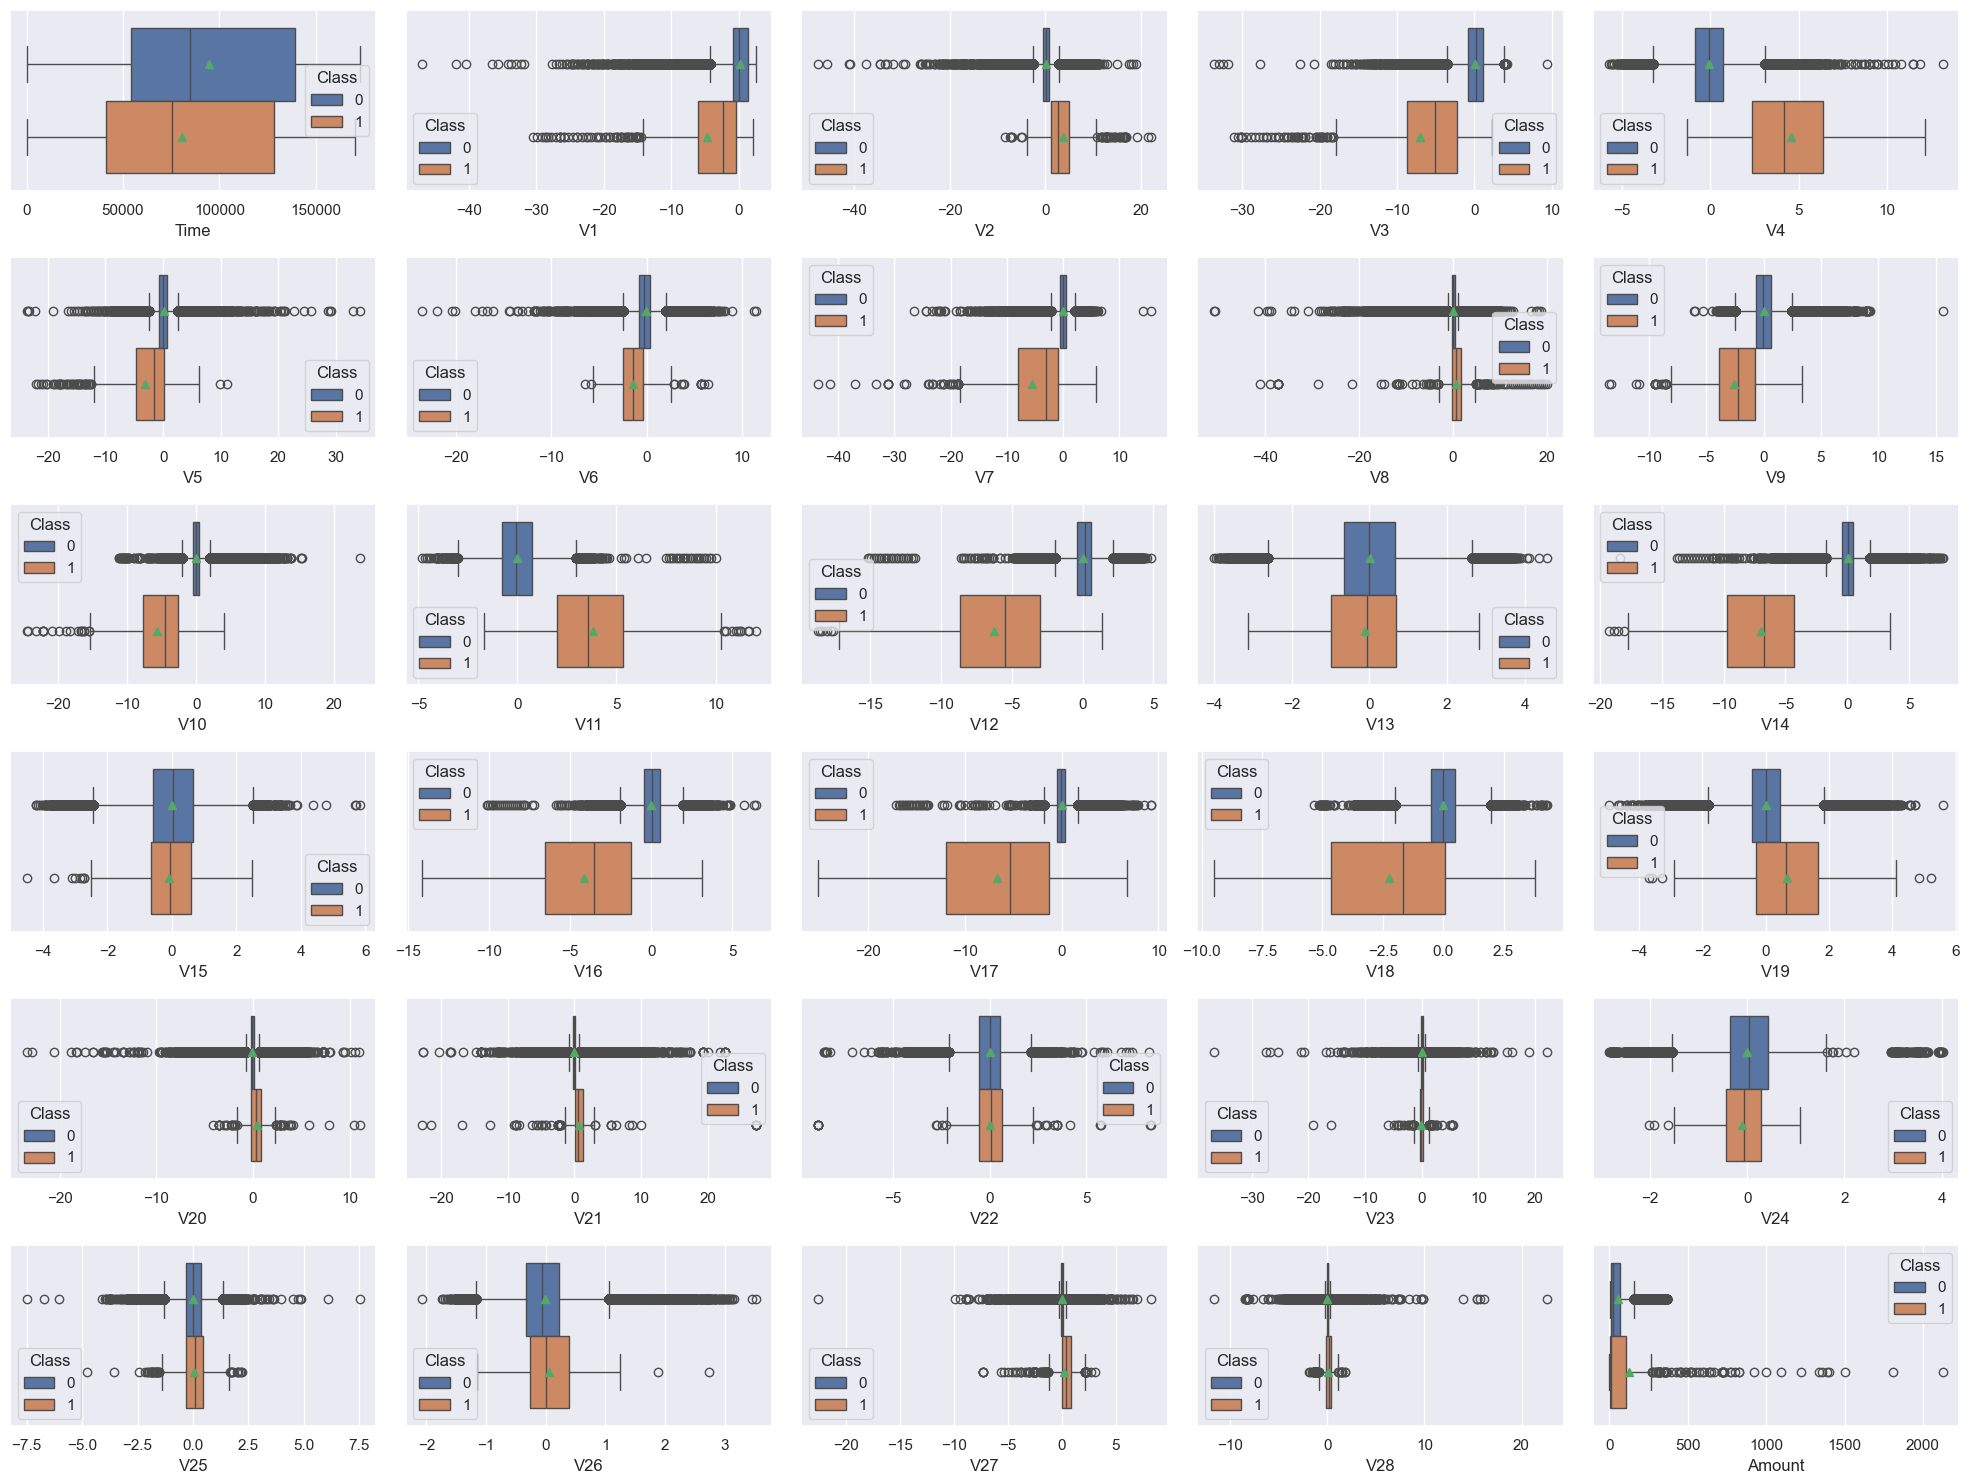

In [29]:
# verificando o resultado nos boxplots
fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(20, 15), tight_layout=True)

for ax, coluna in zip(axs.flatten(), df.columns):
    sns.boxplot(data=df_sem_outliers, x=coluna, ax=ax, hue="Class", showmeans=True)

plt.show()

- Nota-se a diferença entre os boxplots anteriores e o atual, até a escala deles está diferente.

In [30]:
# eliminando as colunas que não têm diferença significativa entre as classes
df_sem_outliers = df_sem_outliers.drop( # eliminando as variáveis desse df
    # criando uma condição para filtrar as colunas que não tiveram uma diferença significava nas distribuições pelo teste U de Mann-Whitney 
    columns=df_mw.query("relacao_significativa == False").index # pegando apenas o índice, que são os nomes das colunas originais
)

df_sem_outliers.shape

(256580, 27)

- Agora temos 4 features a menos no dataframe

In [31]:
# verificando as informações da base de dados
df_sem_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256580 entries, 0 to 256579
Data columns (total 27 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    256580 non-null  float64
 1   V1      256580 non-null  float64
 2   V2      256580 non-null  float64
 3   V3      256580 non-null  float64
 4   V4      256580 non-null  float64
 5   V5      256580 non-null  float64
 6   V6      256580 non-null  float64
 7   V7      256580 non-null  float64
 8   V8      256580 non-null  float64
 9   V9      256580 non-null  float64
 10  V10     256580 non-null  float64
 11  V11     256580 non-null  float64
 12  V12     256580 non-null  float64
 13  V14     256580 non-null  float64
 14  V16     256580 non-null  float64
 15  V17     256580 non-null  float64
 16  V18     256580 non-null  float64
 17  V19     256580 non-null  float64
 18  V20     256580 non-null  float64
 19  V21     256580 non-null  float64
 20  V23     256580 non-null  float64
 21  V24     25

In [32]:
# salvando a base de dados
df_sem_outliers.to_parquet(DADOS_TRATADOS, index=False)